<a href="https://colab.research.google.com/github/Johann-DS7/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_113_Making_Data_backed_Assertions_Assignment_ipynb_John_Mercedes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [23]:
import random
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Johann-DS7/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv')
print(df.shape)
df.head()

(1200, 4)


,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [22]:
df.describe()

,Unnamed: 0,age,weight,exercise_time
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,599.500000,48.396667,153.540833,134.910833
std,346.554469,18.166802,35.132182,85.548895
min,0.000000,18.000000,100.000000,0.000000
25%,299.750000,33.000000,125.000000,65.000000
50%,599.500000,48.000000,149.000000,122.000000
75%,899.250000,64.000000,180.250000,206.000000
max,1199.000000,80.000000,246.000000,300.000000


In [0]:
time_bins = pd.cut(df['exercise_time'], 6)  
weight_bins = pd.cut(df['weight'], 6) 
age_bins = pd.cut(df['age'], 6)
crosstab = pd.crosstab(time_bins, weight_bins)


In [14]:
!pip install pandas==0.23.4

In [31]:
crosstab = pd.crosstab(time_bins, weight_bins, normalize='columns')
crosstab

weight,"(99.854, 124.333]","(124.333, 148.667]","(148.667, 173.0]","(173.0, 197.333]","(197.333, 221.667]","(221.667, 246.0]"
exercise_time,,,,,,
"(-0.3, 50.0]",0.115646,0.121711,0.146245,0.279762,0.366197,0.871795
"(50.0, 100.0]",0.142857,0.154605,0.249012,0.267857,0.436620,0.128205
"(100.0, 150.0]",0.173469,0.088816,0.193676,0.244048,0.183099,0.000000
"(150.0, 200.0]",0.173469,0.203947,0.173913,0.184524,0.014085,0.000000
"(200.0, 250.0]",0.156463,0.207237,0.166008,0.023810,0.000000,0.000000
"(250.0, 300.0]",0.238095,0.223684,0.071146,0.000000,0.000000,0.000000


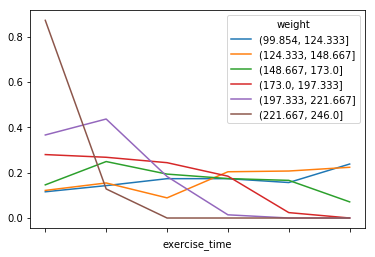

In [32]:
crosstab.plot();

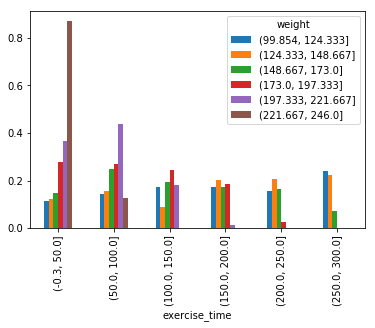

In [38]:
crosstab.plot(kind='bar');

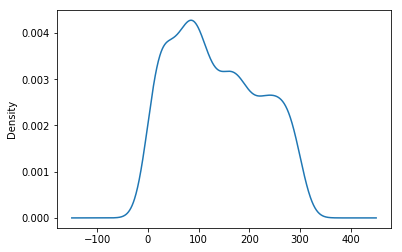

In [37]:
df['exercise_time'].plot.density();

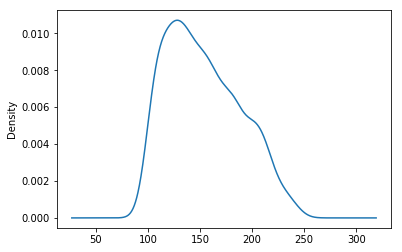

In [40]:
df['weight'].plot.density();

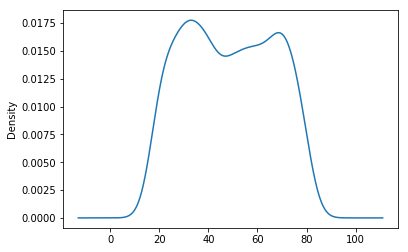

In [41]:
df['age'].plot.density()

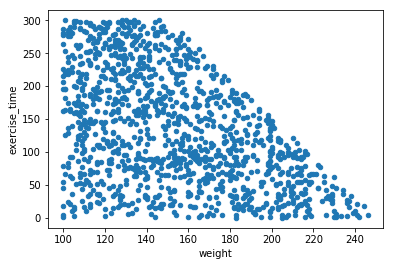

In [44]:
df.plot.scatter('weight','exercise_time');

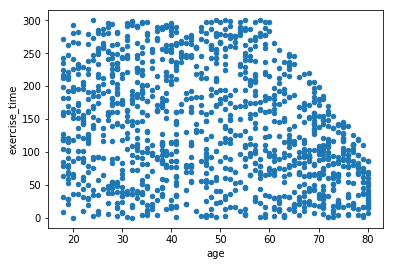

In [45]:
df.plot.scatter('age','exercise_time');

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?

  They're all continous integers


2.  What are the relationships between the variables?

  Seem like the older we get, the less we work out


3.  Which relationships are "real", and which spurious?

  Age and weight, I think. 


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)